# Assignment 3 - Bank Marketing Data Set
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

Identitas : Yusraini Nurul Asra (PYTN-KS19-017)

# **Project Overview**
The [data](https://archive.ics.uci.edu/dataset/222/bank+marketing) is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1, and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

This dataset contains:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Libraries

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["seaborn"])
%matplotlib inline

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

## Data Loading 

In [2]:
# Membuka file dataset dengan pandas
df = pd.read_csv('bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', None)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Cleaning

### Check Missing Values

In [4]:
# Pada dataset terlihat bahwa ada yang berisikan unknown, akan dilihat value unknown terdapat pada column apa saja
print(df.isin(['unknown']).any())

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


In [5]:
# Selanjutnya unknown akan didefinisikan dengan NA atau missing values
df.replace("unknown",np.nan,inplace=True)

In [6]:
# Mengecek missing values beserta percentagenya
pd.DataFrame({
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns],
    "type":df.dtypes.values
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,null,null_percentage,unique,sample,type
default,8597,20.872584,2,no,object
education,1731,4.202680,7,high.school,object
housing,990,2.403613,2,no,object
loan,990,2.403613,2,no,object
job,330,0.801204,11,technician,object
marital,80,0.194231,3,single,object
age,0,0.000000,78,28,int64
poutcome,0,0.000000,3,success,object
nr.employed,0,0.000000,11,5195.8,float64
euribor3m,0,0.000000,316,1.215,float64


In [7]:
# Akan dilakukan handling missing values dengan dropna(), karena missing values yang terdapat pada dataset tidak terlalu banyak
df.dropna(inplace=True)

# Cek apakah masih terdapat missing values
df.isnull().sum().sum()

0

### Check Duplicated Data

In [8]:
# Mengecek data duplikat
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [9]:
# Menggambil seluruh kolom
kolom = df.columns.tolist()

# Menghapus data duplikat yang sama persis
df = df.drop_duplicates(subset=kolom)

# Cek apakah masih terdapat data duplikat
df.duplicated().sum()

0

In [10]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 30478 dan kolom berjumlah 21


## Visualization

### Correlation

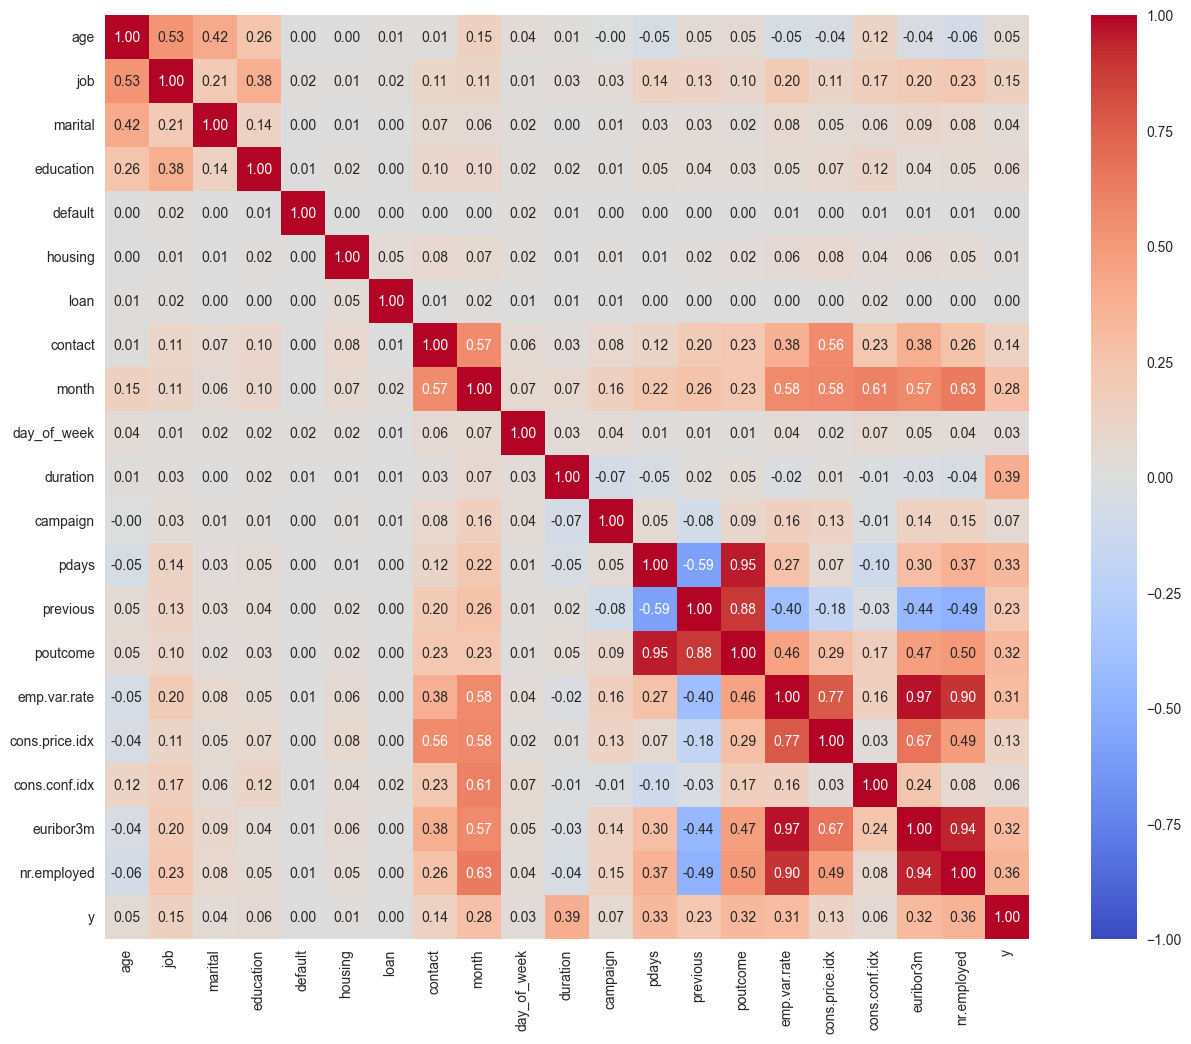

In [11]:
# Melihat correlation pada dataset
corr = associations(df,figsize=(16,12),cmap='coolwarm')

Menurut [beberapa sumber](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html), kekuatan correlation coefficient sbb:

| Correlation Coefficient | Decription |
| :---: | :---: |
| 1.0 | Perfect Positive |
| 0.8 to 1.0 | Very Strong |
| 0.6 to 0.8 | Strong |
| 0.4 to 0.6 | Moderate |
| 0.2 to 0.4 | Weak |
| 0.0 to 0.2 | Very Weak |
| 0.0 to -0.2 | Very Weak |
| -0.2 to -0.4 | Weak |
| -0.4 to -0.6 | Moderate |
| -0.6 to -0.8 | Strong |
| -0.8 to -1.0 | Very Strong |
| -1.0 | Perfect Negative |

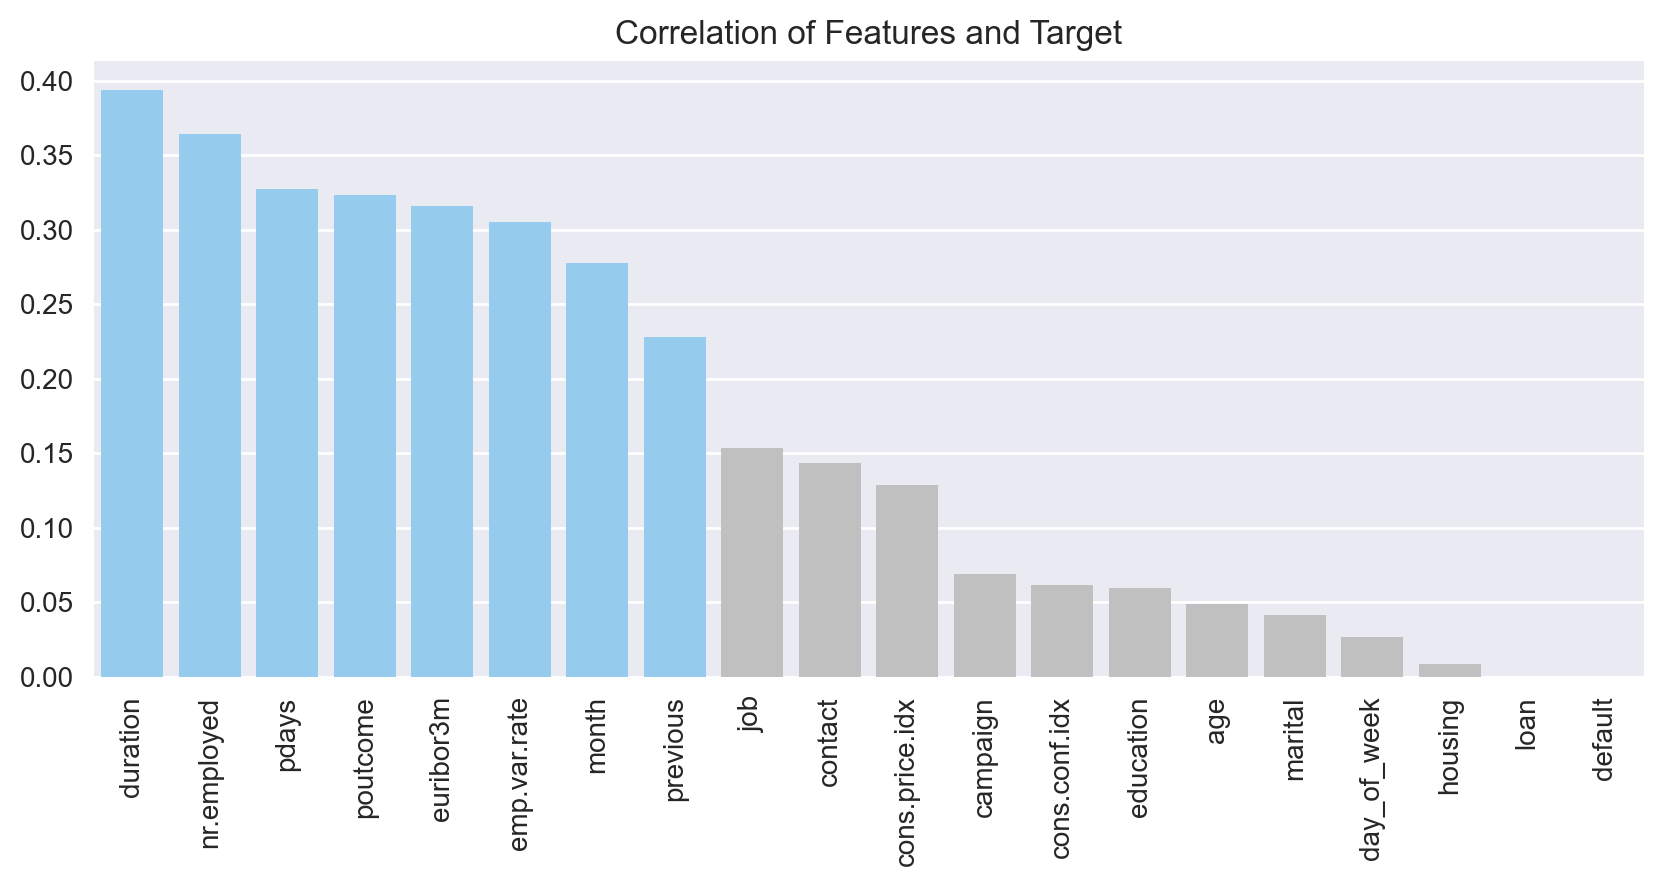

In [12]:
# Correlation akan disort dan divisualisasikan dalam bentuk bar plot agar lebih mudah dilihat
correlation = corr["corr"].iloc[:-1][["y"]].sort_values(by="y",ascending=False)

# Membedakan warna untuk correlation yang sangat lemah yakni di bawah 0.2
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=correlation,x=correlation.index,y="y",palette=["lightskyblue" if i >= 0.2 else "silver" for i in correlation["y"]])
plt.title("Correlation of Features and Target")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

Dapat dilihat bahwa terdapat 8 features dengan kekuatan correlation weak-moderate (yang berwarna biru) dan terdapat 12 features yang memiliki correlation very weak (yang berwarna abu-abu).

### Data Distribution

In [13]:
# Memilih color pallete
colors = sns.color_palette("pastel")
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [14]:
# Terlebih dahulu pisahkan categorical dan numerical columns
cat_columns,num_columns = identify_nominal_columns(df),identify_numeric_columns(df)
cat_columns.remove('y')
for i,j in zip(["Categorical Columns","Numerical Columns"],[cat_columns,num_columns]):
    print(f"{i}\t: {j}")

Categorical Columns	: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical Columns	: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


#### Numerical Features Distribution

In [15]:
# Plot Histogram, KDE, Boxplot untuk Numerical Features
def num_eda(data, feature, target, bins):
    df_set_pos = data[data[target] == "yes"].drop(target, axis=1)
    df_set_neg = data[data[target] == "no"].drop(target, axis=1)

    fig, axes = plt.subplots(2, 2, figsize=(18, 6))

    # Histogram with kernel density estimate (KDE) untuk numerical feature
    ax1 = sns.histplot(x=feature, data=data, ax=axes[0, 0], bins=bins, kde=True, edgecolor="k", color=colors[4])
    ax1.grid(linestyle='--', linewidth=0.1, color=colors[7])
    ax1.set_title(f"{feature} Distribution")

    # Plot KDEs untuk positive dan negative target classes di axis yang sama
    ax2 = sns.kdeplot(x=feature, data=df_set_pos, ax=axes[0, 1], label="yes", color=colors[2])
    ax2_1 = sns.kdeplot(x=feature, data=df_set_neg, ax=axes[0, 1], label="no", color=colors[1])
    ax2.grid(linestyle='--', linewidth=0.1, color=colors[7])
    ax2.set_title(f"{feature} Distribution by Target Class")
    ax2.legend()

    # Boxplot untuk numerical feature
    ax3 = sns.boxplot(x=feature, data=data, ax=axes[1, 0], color=colors[4])
    ax3.grid(linestyle='--', linewidth=0.5, color=colors[7])

    # Horizontal boxplot untuk target variable
    ax4 = sns.boxplot(x=feature, y=target, data=data, ax=axes[1, 1], orient="h", hue=target,
                      palette=[colors[1], colors[2]])
    ax4.grid(linestyle='--', linewidth=0.1, color=colors[7])

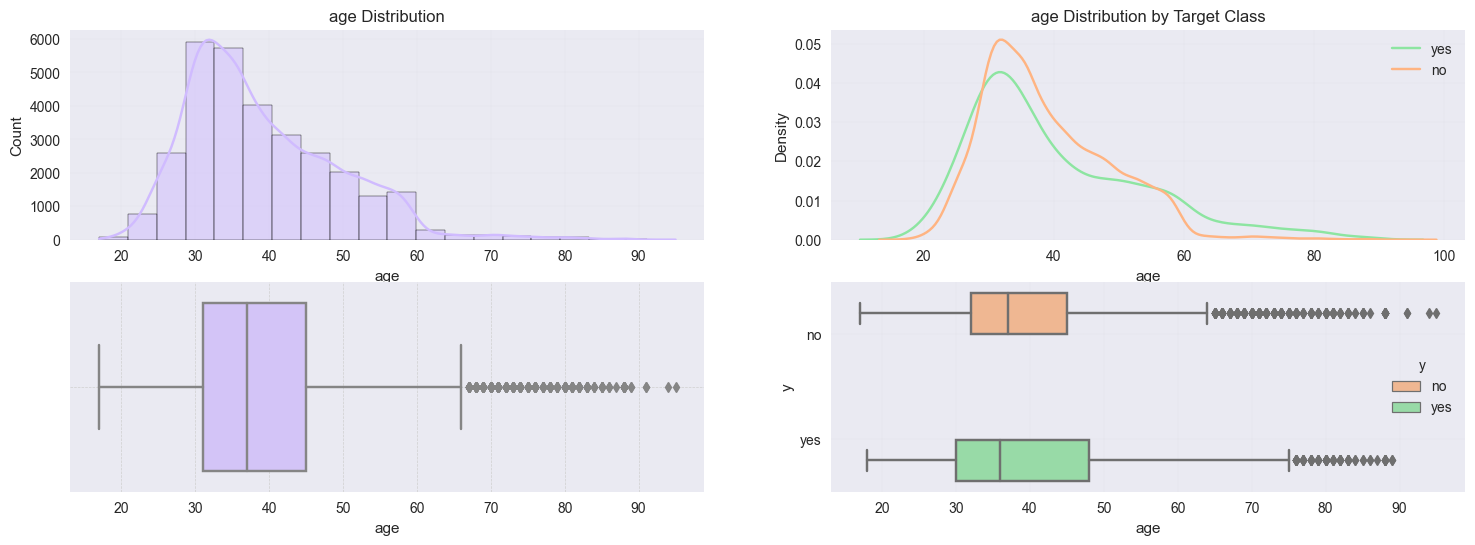

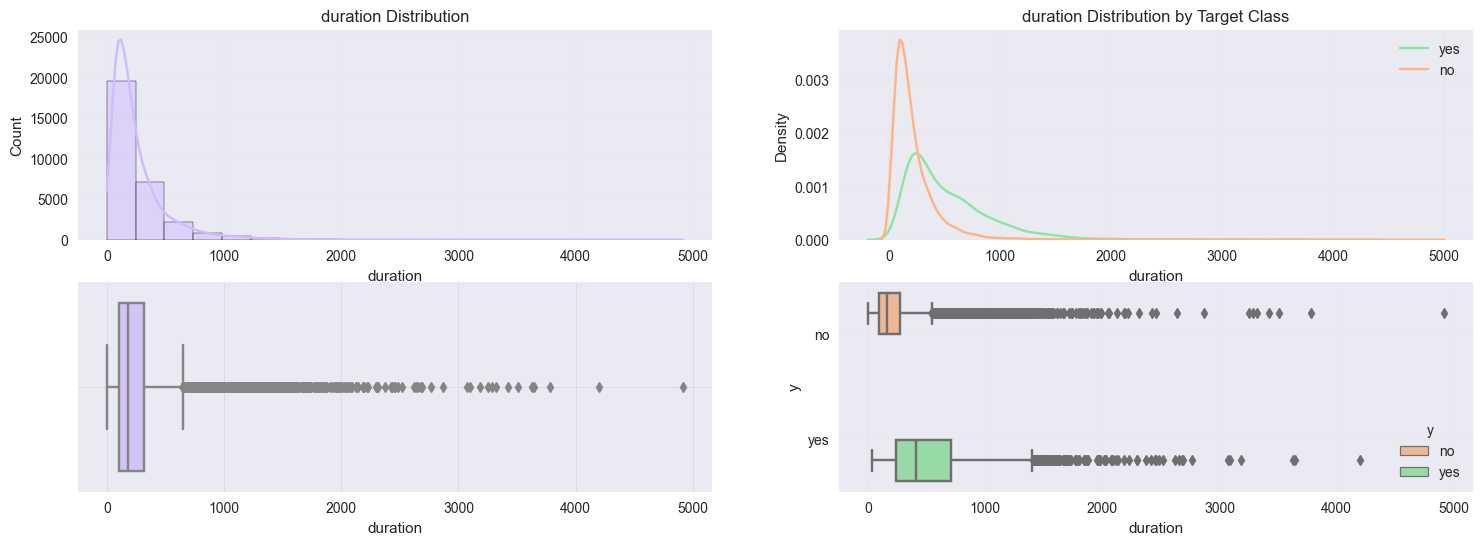

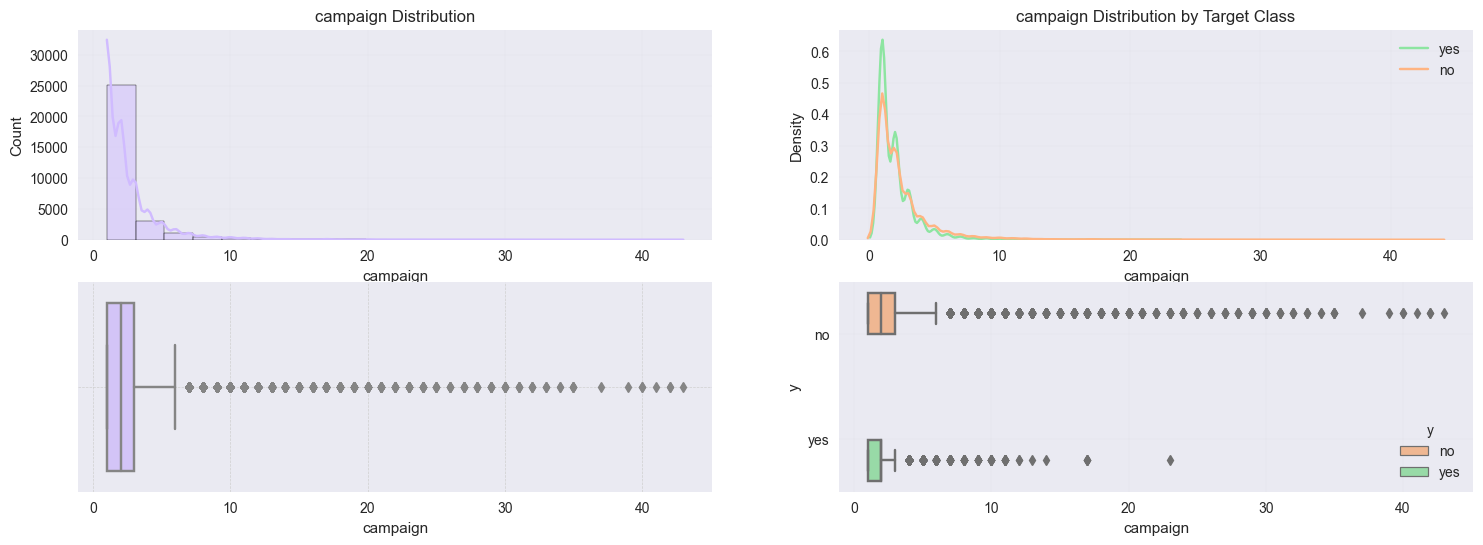

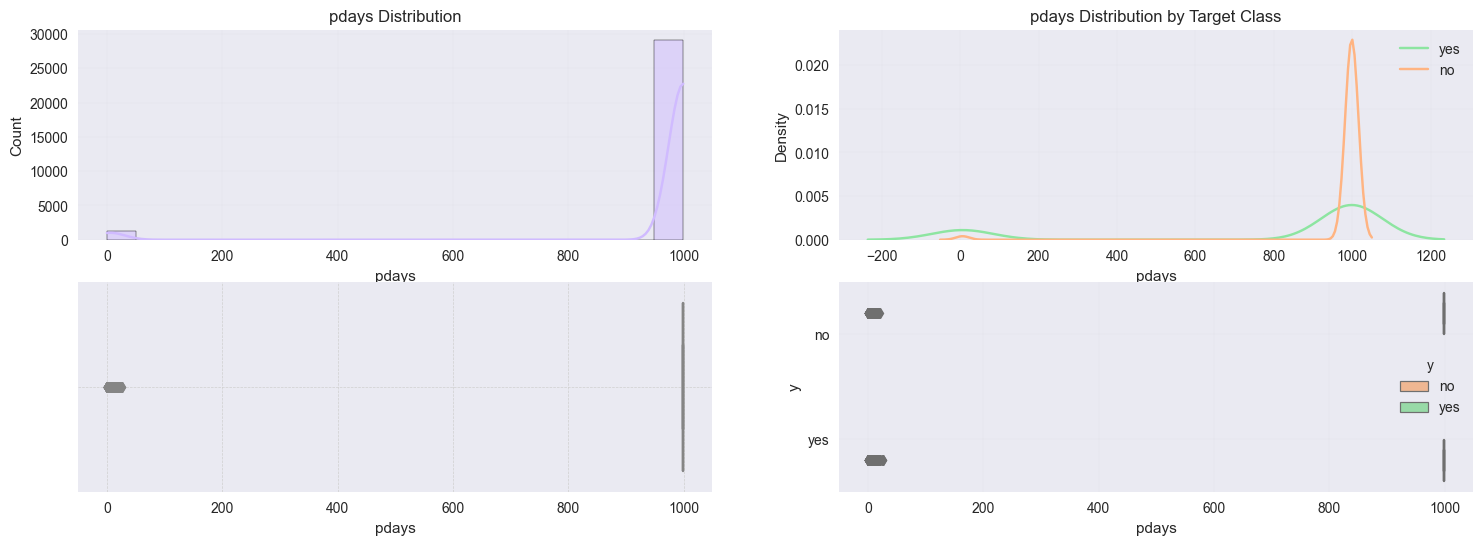

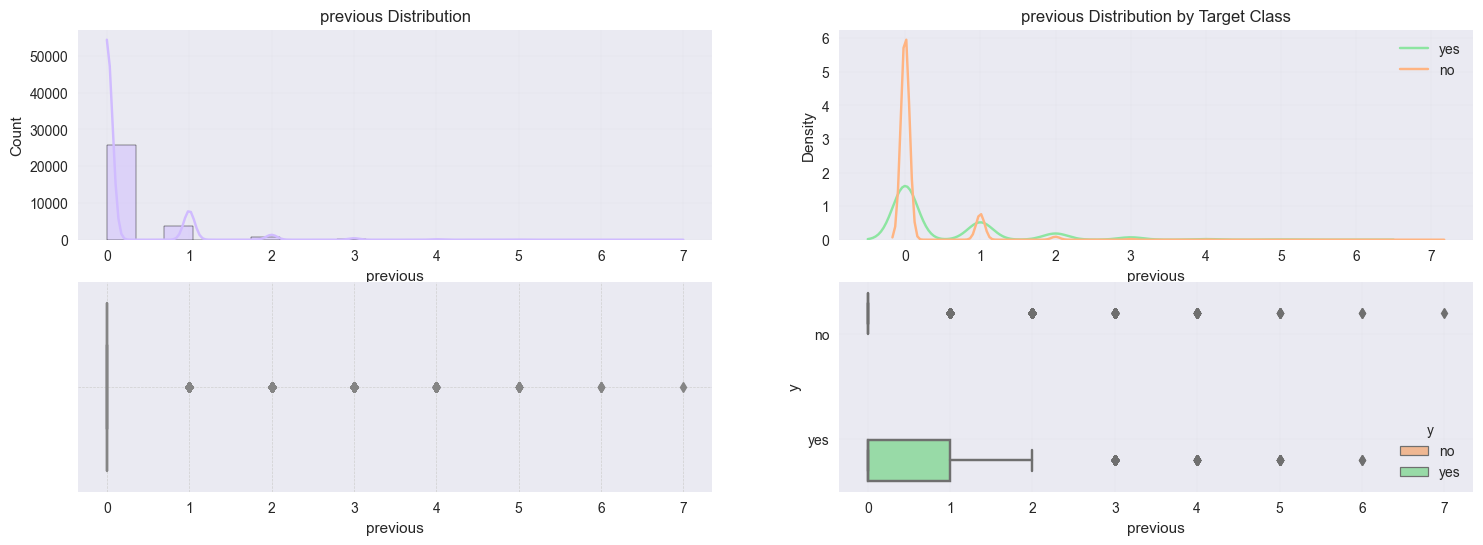

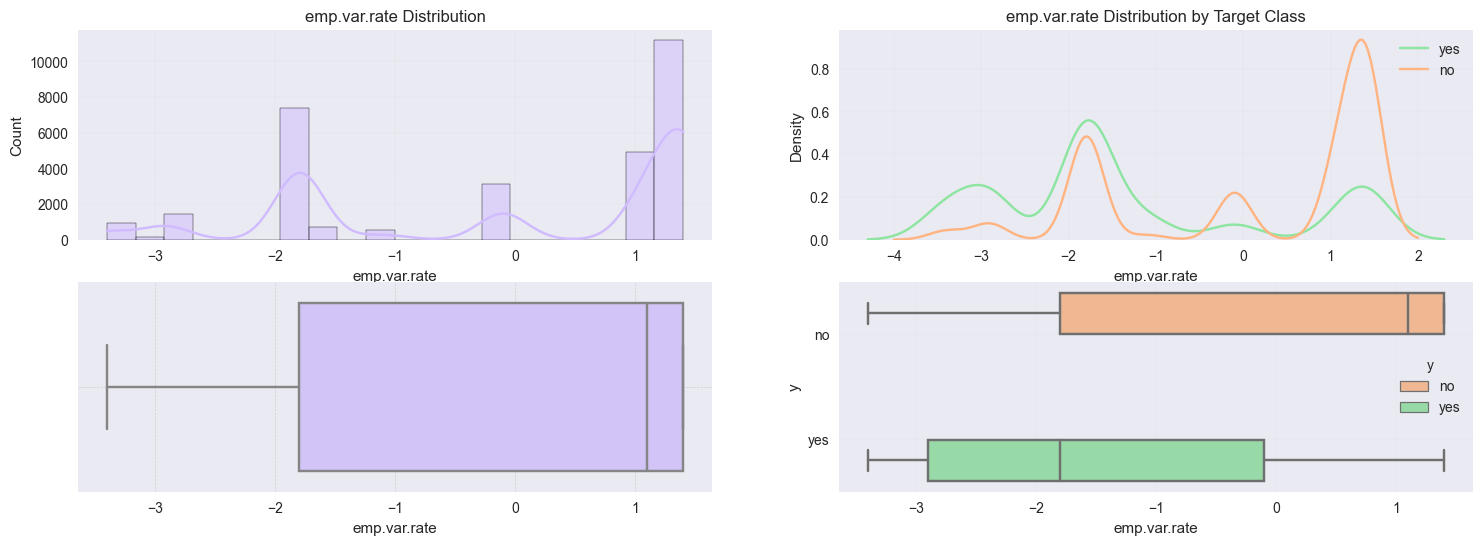

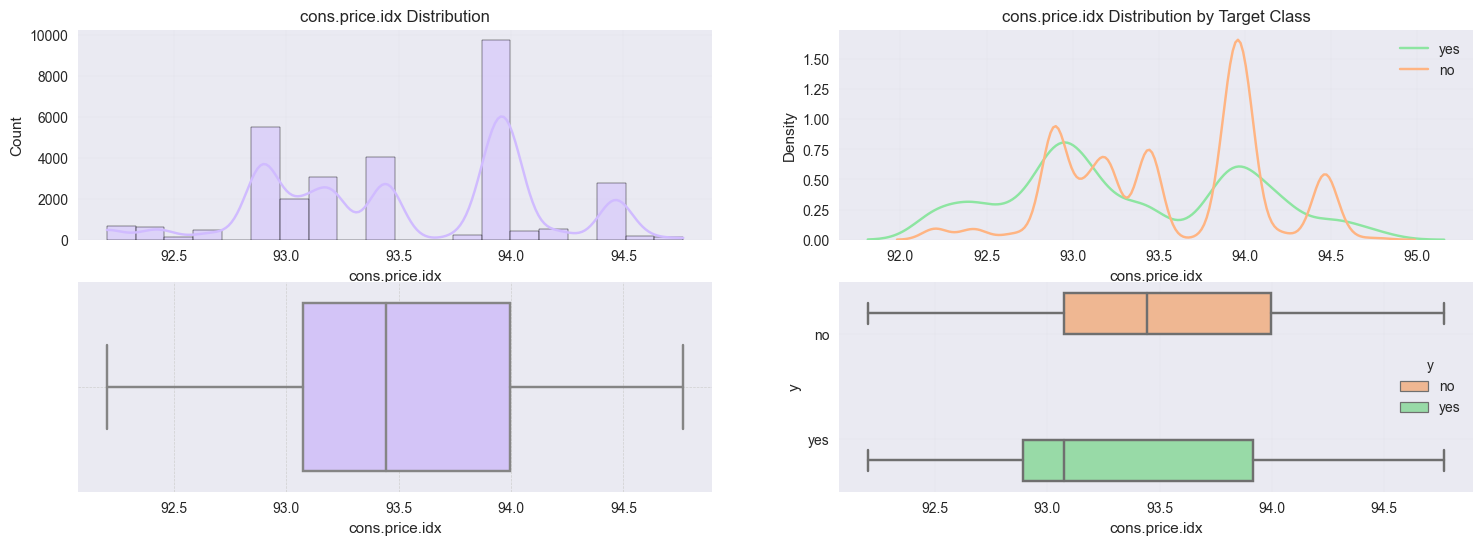

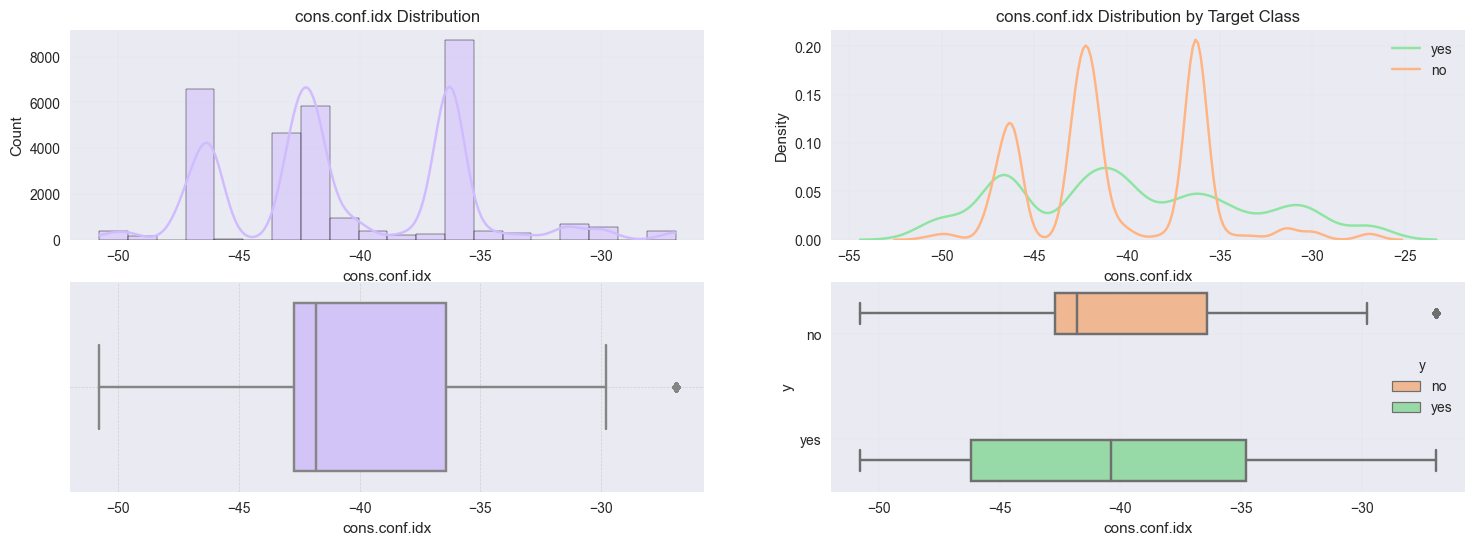

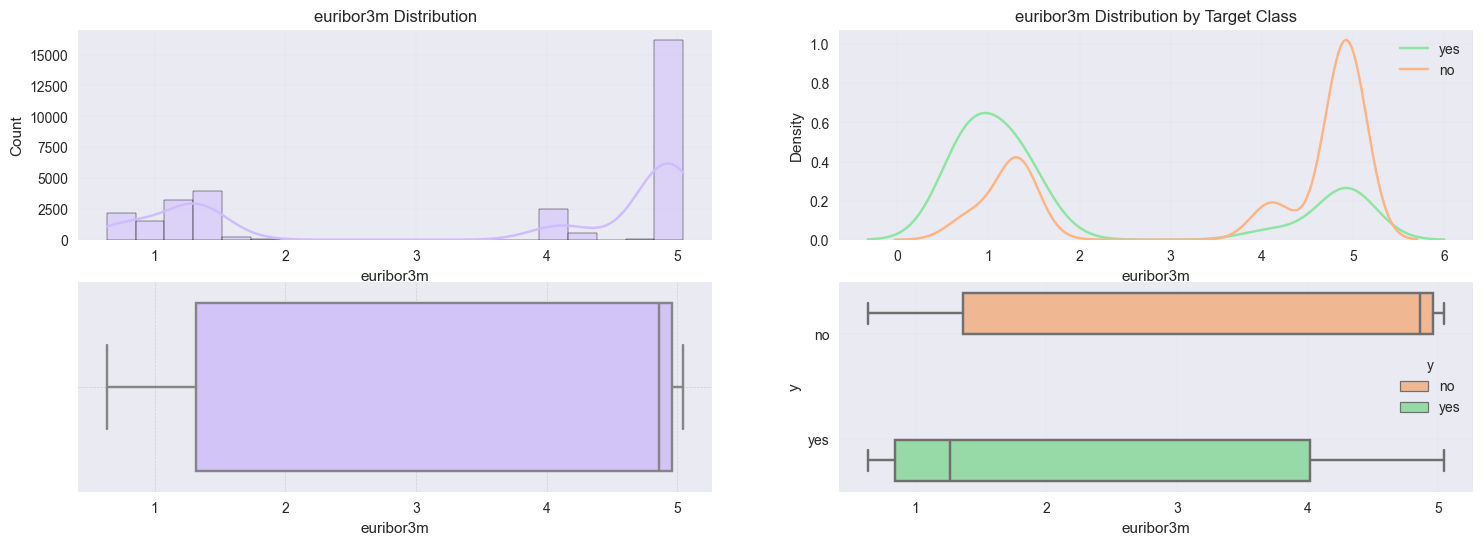

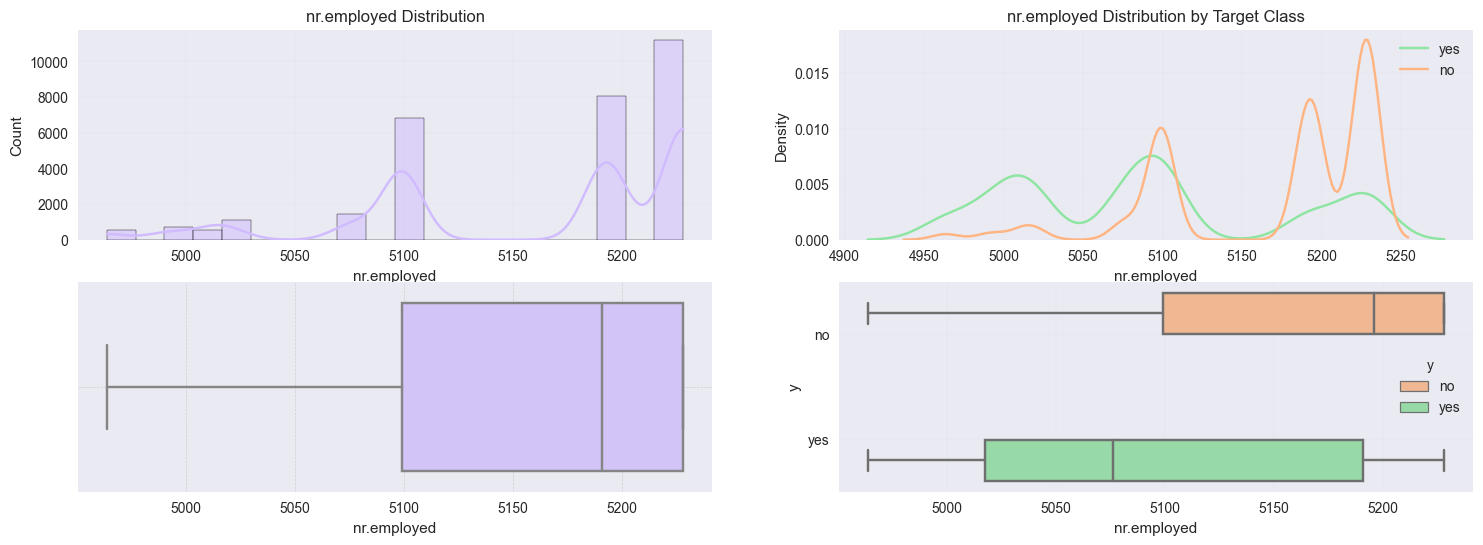

In [16]:
for col in num_columns:
    num_eda(df,col,"y",bins = 20)

Umur pelanggan berkisar antara 20 hingga 90 tahun, namun sebagian besar pelanggan berusia antara 20 dan 60 tahun. Untuk pelanggan berusia 70 tahun ke atas, tingkat keberhasilan campaigns cenderung sedikit lebih tinggi. Column "pdays" bernilai 999 yang menunjukkan bahwa pelanggan belum pernah dihubungi sebelumnya. Nilai ini dapat menjadi indikator yang baik untuk memprediksi apakah pelanggan akan berlangganan deposito. Oleh karena itu, akan dibiarkan apa adanya. Kita dapat membuat fitur baru dari kolom ini, seperti "pyears" dan "pmonth", yang mewakili konversi dari hari ke tahun atau bulan. Selain itu, kita dapat membuat fitur untuk menentukan apakah pelanggan baru saja dihubungi atau tidak berdasarkan informasi ini.

### Categorical Features Distribution

In [17]:
# Plot Categorical Features 
def cat_eda(data, feature, target):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Count plot untuk feature distribution
    ax1 = sns.countplot(x=feature, data=data, ax=axes[0], color=colors[0], edgecolor=colors[7])
    ax1.set_title(f"{feature} Distribution")

    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Count plot untuk feature distribution dengan target
    ax2 = sns.countplot(x=feature, hue=target, data=data, ax=axes[1], palette=[colors[3], colors[8]], edgecolor=colors[7])
    ax2.set_title(f"{feature} Distribution with Target")

    ax2.set_xticks(ax2.get_xticks())
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

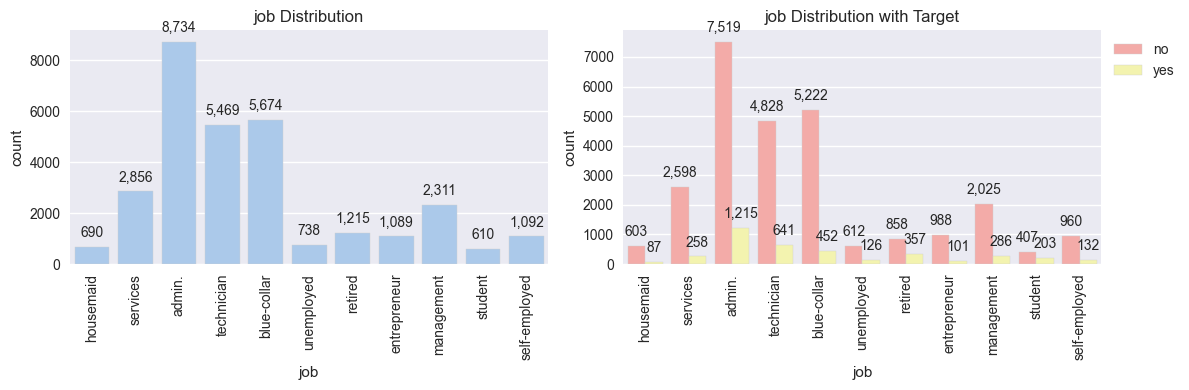

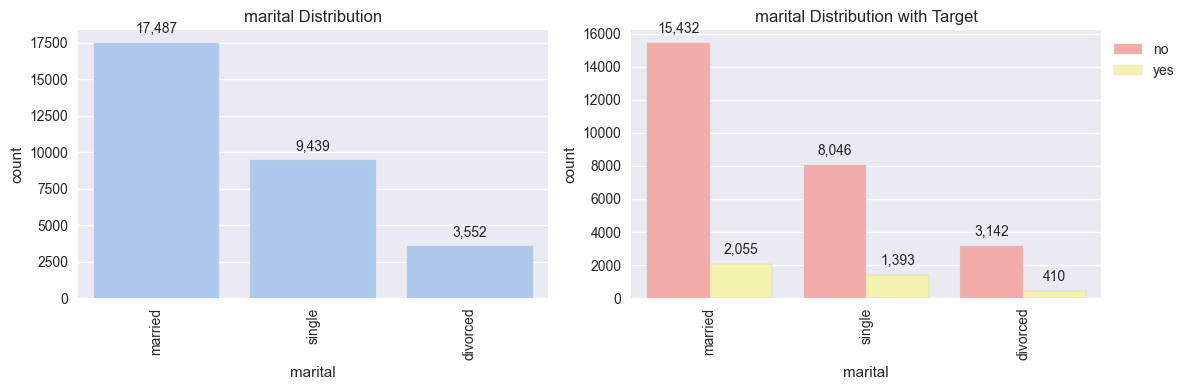

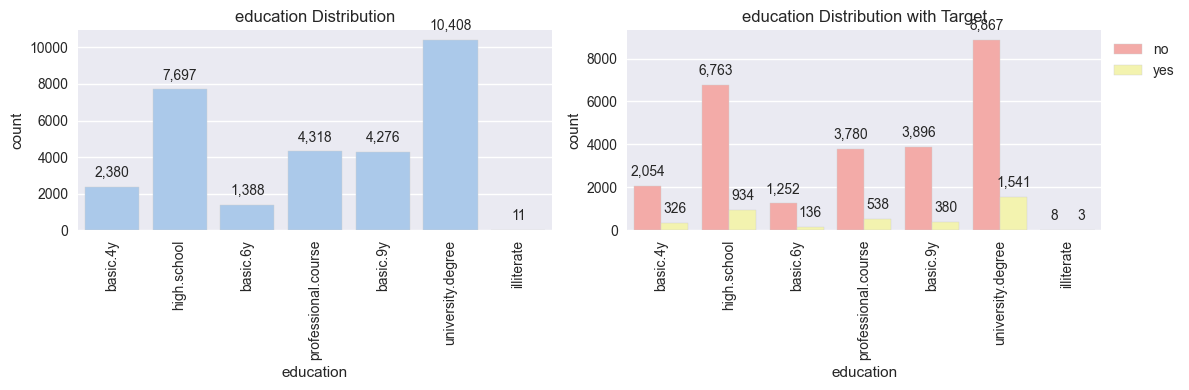

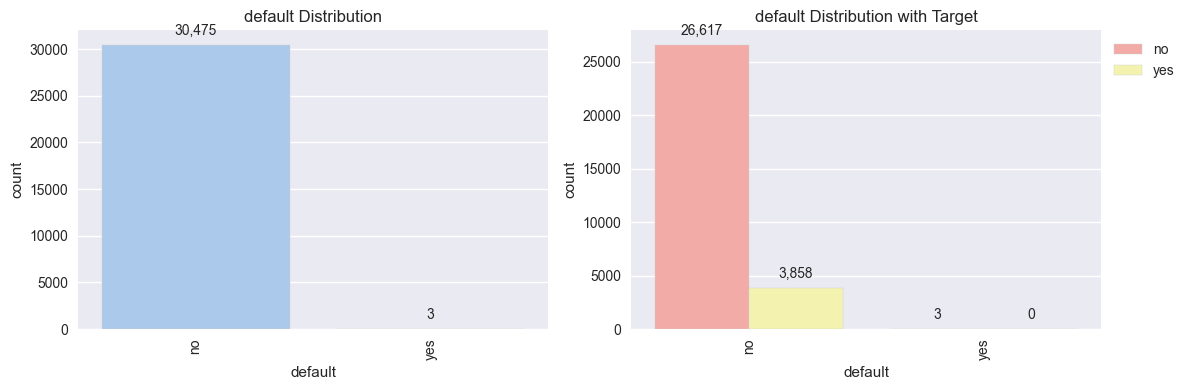

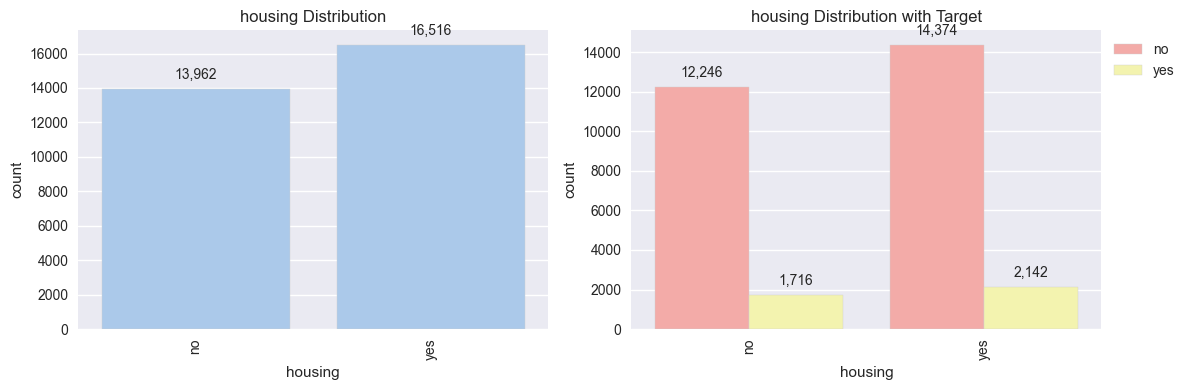

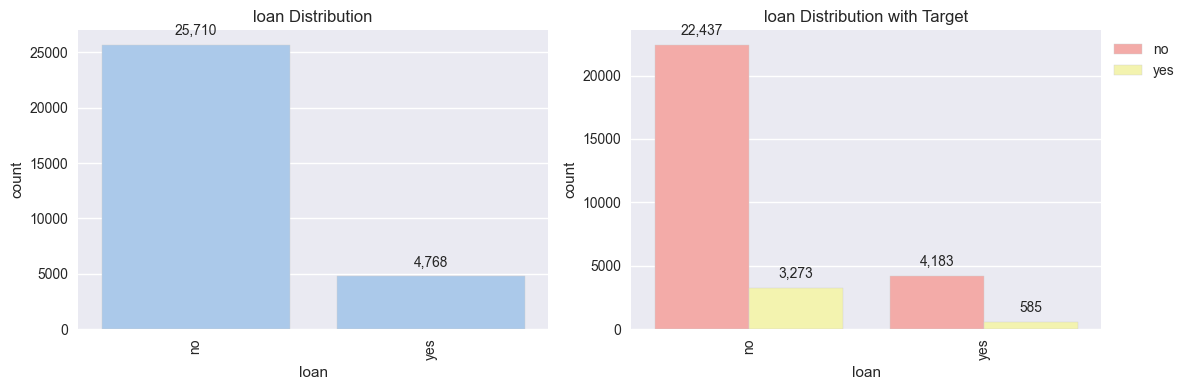

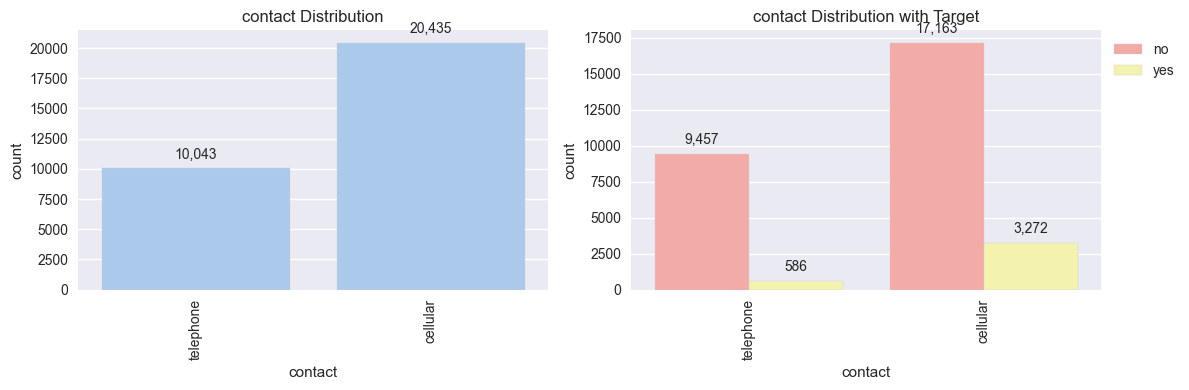

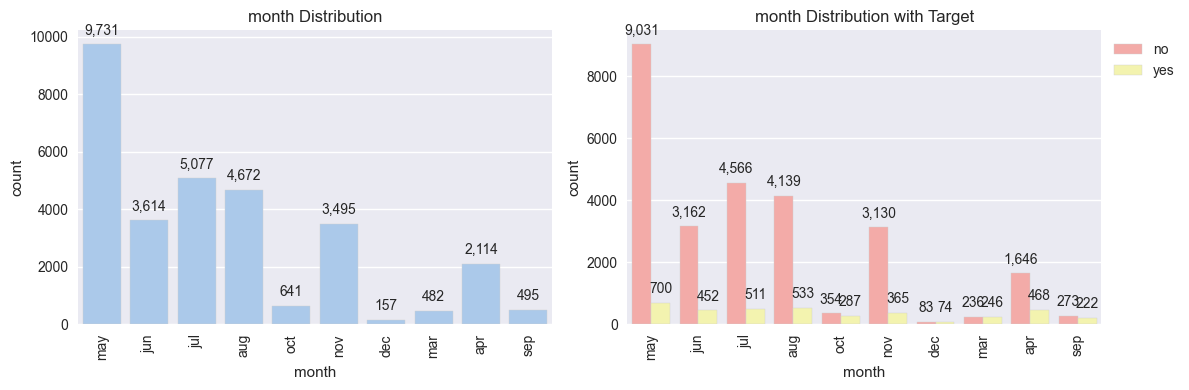

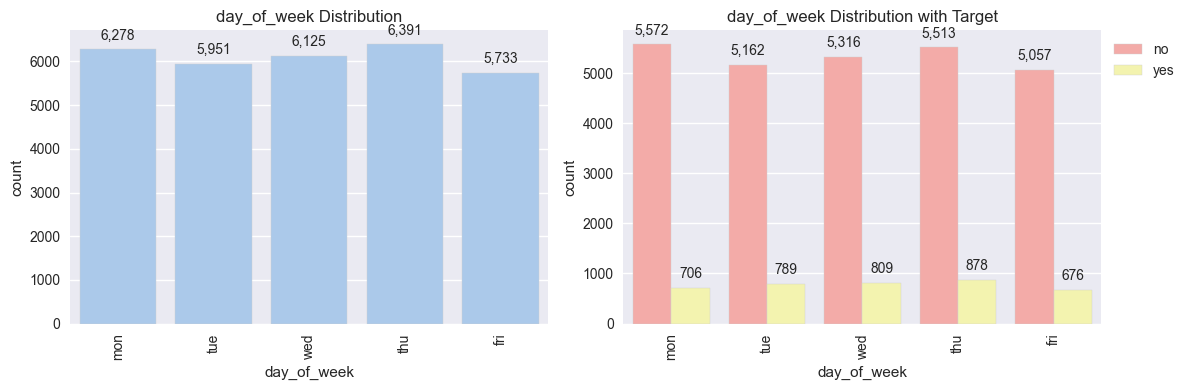

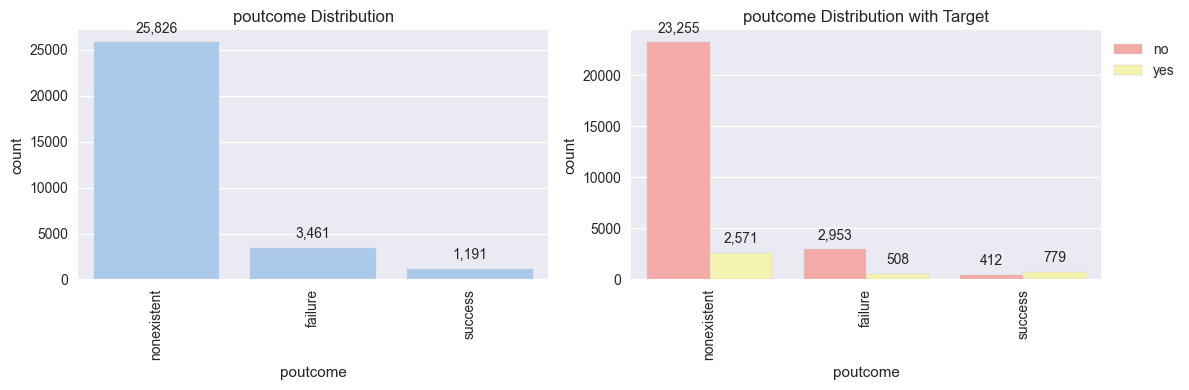

In [18]:
for col in cat_columns:
    cat_eda(df, col, "y")

### Y Distribution

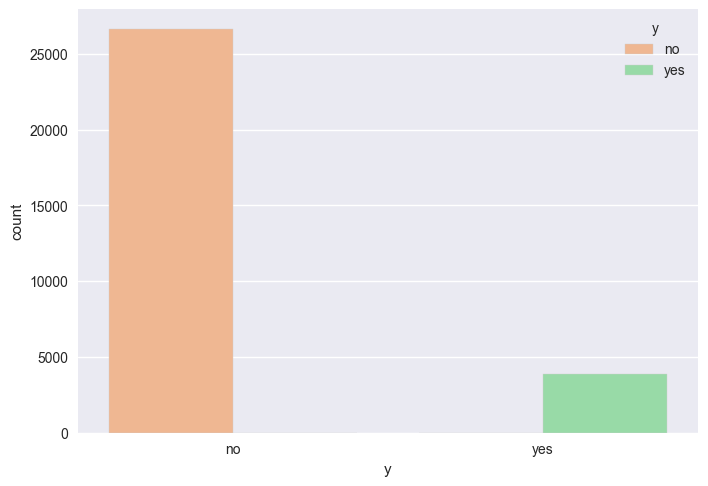

In [19]:
sns.countplot(x="y", data=df, hue="y", palette=[colors[1], colors[2]], edgecolor=colors[7])
plt.show()

Karena terdapat kondisi imbalance pada dataset, maka perlu dilakukan resampling terhadap dataset tersebut. Imbalance adalah masalah umum dalam klasifikasi machine learning dimana kelas tidak seimbang karena terdapat rasio yang tidak proporsional di setiap kelas. Sebagian besar algoritma machine learning tidak dapat bekerja dengan baik apabila dataset tidak seimbang. Resampling dapat dilakukan dengan oversampling, undersampling, atau menggabungkan keduanya, dan masih banyak lagi. Pada kali ini akan dilakukan resampling dengan SMOTE() untuk mengatasi masalah kelas imbalance. Perlu dicatat bahwa resampling hanya dilakukan pada data training saja, data testingnya tidak.

## Data Preprocessing

In [20]:
# Akan dilakukan LabelEncoder terlebih dahulu
LE = LabelEncoder()

# Mendefinisikan variabel independent (X) dan variabel dependent (y)
X = df.drop("y",axis=1).apply(LE.fit_transform)
y = df["y"]

In [21]:
# Split dataframe menjadi data training dan data testing dengan ratio 80:20
Xtrain,X_test,ytrain,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training dataset\t: {len(Xtrain)}\t({round(len(Xtrain) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)}\t({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 24382	(80%)
Testing dataset		: 6096	(20%)


In [22]:
# Resampling menggunakan SMOTE(), karena terdapat kondisi imbalance pada dataset
smote = SMOTE(random_state=1)
X_train,y_train = smote.fit_resample(Xtrain,ytrain)

In [23]:
# Karena setiap variabel independen memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan StandardScaler()
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modelling (Models Definition, Models Training, Models Evaluation)

### Logistic Regression

In [24]:
# Model Definition
log_model = LogisticRegression(solver="liblinear",random_state=42)

# Model Training
log_model.fit(scaled_X_train,y_train)
log_pred = log_model.predict(scaled_X_test)

# Model Evaluation
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

          no       0.96      0.88      0.92      5309
         yes       0.47      0.72      0.57       787

    accuracy                           0.86      6096
   macro avg       0.71      0.80      0.74      6096
weighted avg       0.89      0.86      0.87      6096



Equation logistic regression model:
$$ \pi(x) = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n}} $$

In [25]:
pd.DataFrame(
    data=[log_model.intercept_[0]] + list(log_model.coef_[0]),
    columns=["Unstandardized Coefficients"],
    index=["Constant"] + list(X.columns)
)

,Unstandardized Coefficients
Constant,0.091362
age,-0.195721
job,-0.044897
marital,-0.337508
education,0.062111
default,-0.031400
housing,-0.359851
loan,-0.387608
contact,-0.597593
month,-0.297151


In [26]:
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(log_model.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(log_model.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(-0.195721*(age) - 0.389566*(campaign) + 0.2702*(cons.conf.idx) + 0.320079*(cons.price.idx) - 0.597593*(contact) - 0.166423*(day_of_week) - 0.0314*(default) + 1.936826*(duration) + 0.062111*(education) - 0.767809*(emp.var.rate) + 0.322802*(euribor3m) - 0.359851*(housing) - 0.044897*(job) - 0.387608*(loan) - 0.337508*(marital) - 0.297151*(month) - 1.218524*(nr.employed) - 1.391488*(pdays) - 0.451533*(poutcome) - 0.925055*(previous) + 0.091362)/(e**(-0.195721*(age) - 0.389566*(campaign) + 0.2702*(cons.conf.idx) + 0.320079*(cons.price.idx) - 0.597593*(contact) - 0.166423*(day_of_week) - 0.0314*(default) + 1.936826*(duration) + 0.062111*(education) - 0.767809*(emp.var.rate) + 0.322802*(euribor3m) - 0.359851*(housing) - 0.044897*(job) - 0.387608*(loan) - 0.337508*(marital) - 0.297151*(month) - 1.218524*(nr.employed) - 1.391488*(pdays) - 0.451533*(poutcome) - 0.925055*(previous) + 0.091362) + 1))

### K-Nearest Neighbors

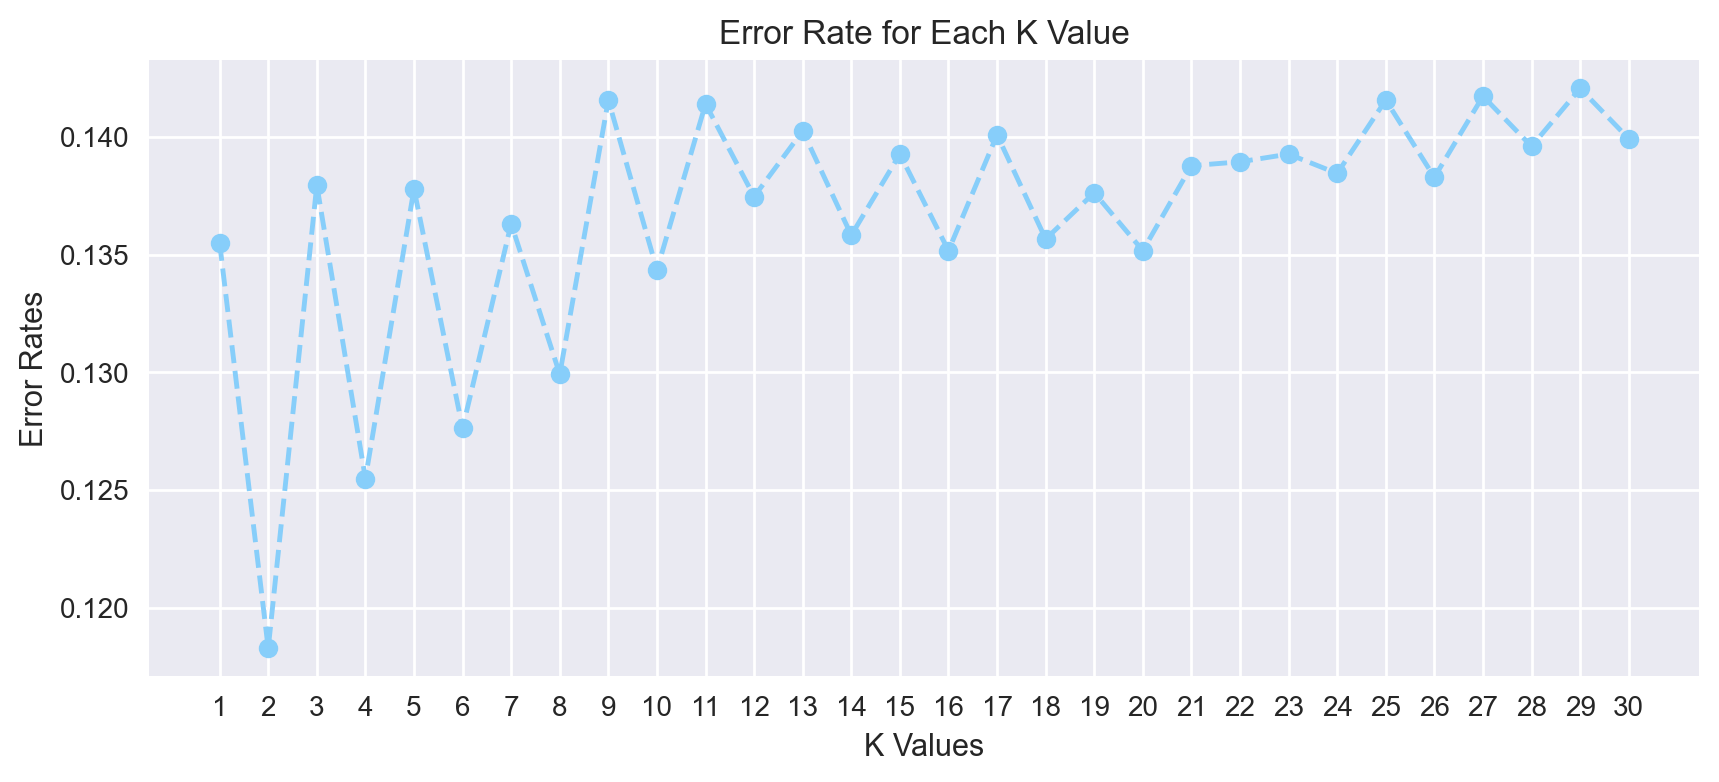

In [27]:
# Menentukan nilai K optimum dengan membandingkan nilai K dengan masing-masing error ratesnya
errors = []
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,pred)
    errors.append(error)

plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),errors,color="lightskyblue",marker="o",ls="--")
plt.title("Error Rate for Each K Value")
plt.xlabel("K Values")
plt.xticks(range(1,31))
plt.ylabel("Error Rates")
plt.show()

Dari plot di atas dapat dilihat bahwa nilai K optimalnya adalah 2, selanjutnya akan dibuat KNN model dengan K = 2

In [28]:
# Model Definition
knn_model = KNeighborsClassifier(n_neighbors=2)

# Model Training
knn_model.fit(scaled_X_train,y_train)
knn_pred = knn_model.predict(scaled_X_test)

# Model Evaluation
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          no       0.92      0.94      0.93      5309
         yes       0.55      0.48      0.51       787

    accuracy                           0.88      6096
   macro avg       0.74      0.71      0.72      6096
weighted avg       0.88      0.88      0.88      6096



### Support Vector Machine

In [29]:
# Model Definition
svm_model = SVC(kernel='rbf',random_state=42)

# Model Training
svm_model.fit(scaled_X_train,y_train)
svm_pred = svm_model.predict(scaled_X_test)

# Model Evaluation
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          no       0.96      0.90      0.93      5309
         yes       0.51      0.74      0.61       787

    accuracy                           0.88      6096
   macro avg       0.74      0.82      0.77      6096
weighted avg       0.90      0.88      0.89      6096



### Decision Tree

In [30]:
# Model Definition
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Model Training
dt_model.fit(scaled_X_train,y_train)
dt_pred = dt_model.predict(scaled_X_test)

# Model Evaluation
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          no       0.94      0.92      0.93      5309
         yes       0.51      0.59      0.55       787

    accuracy                           0.87      6096
   macro avg       0.72      0.75      0.74      6096
weighted avg       0.88      0.87      0.88      6096



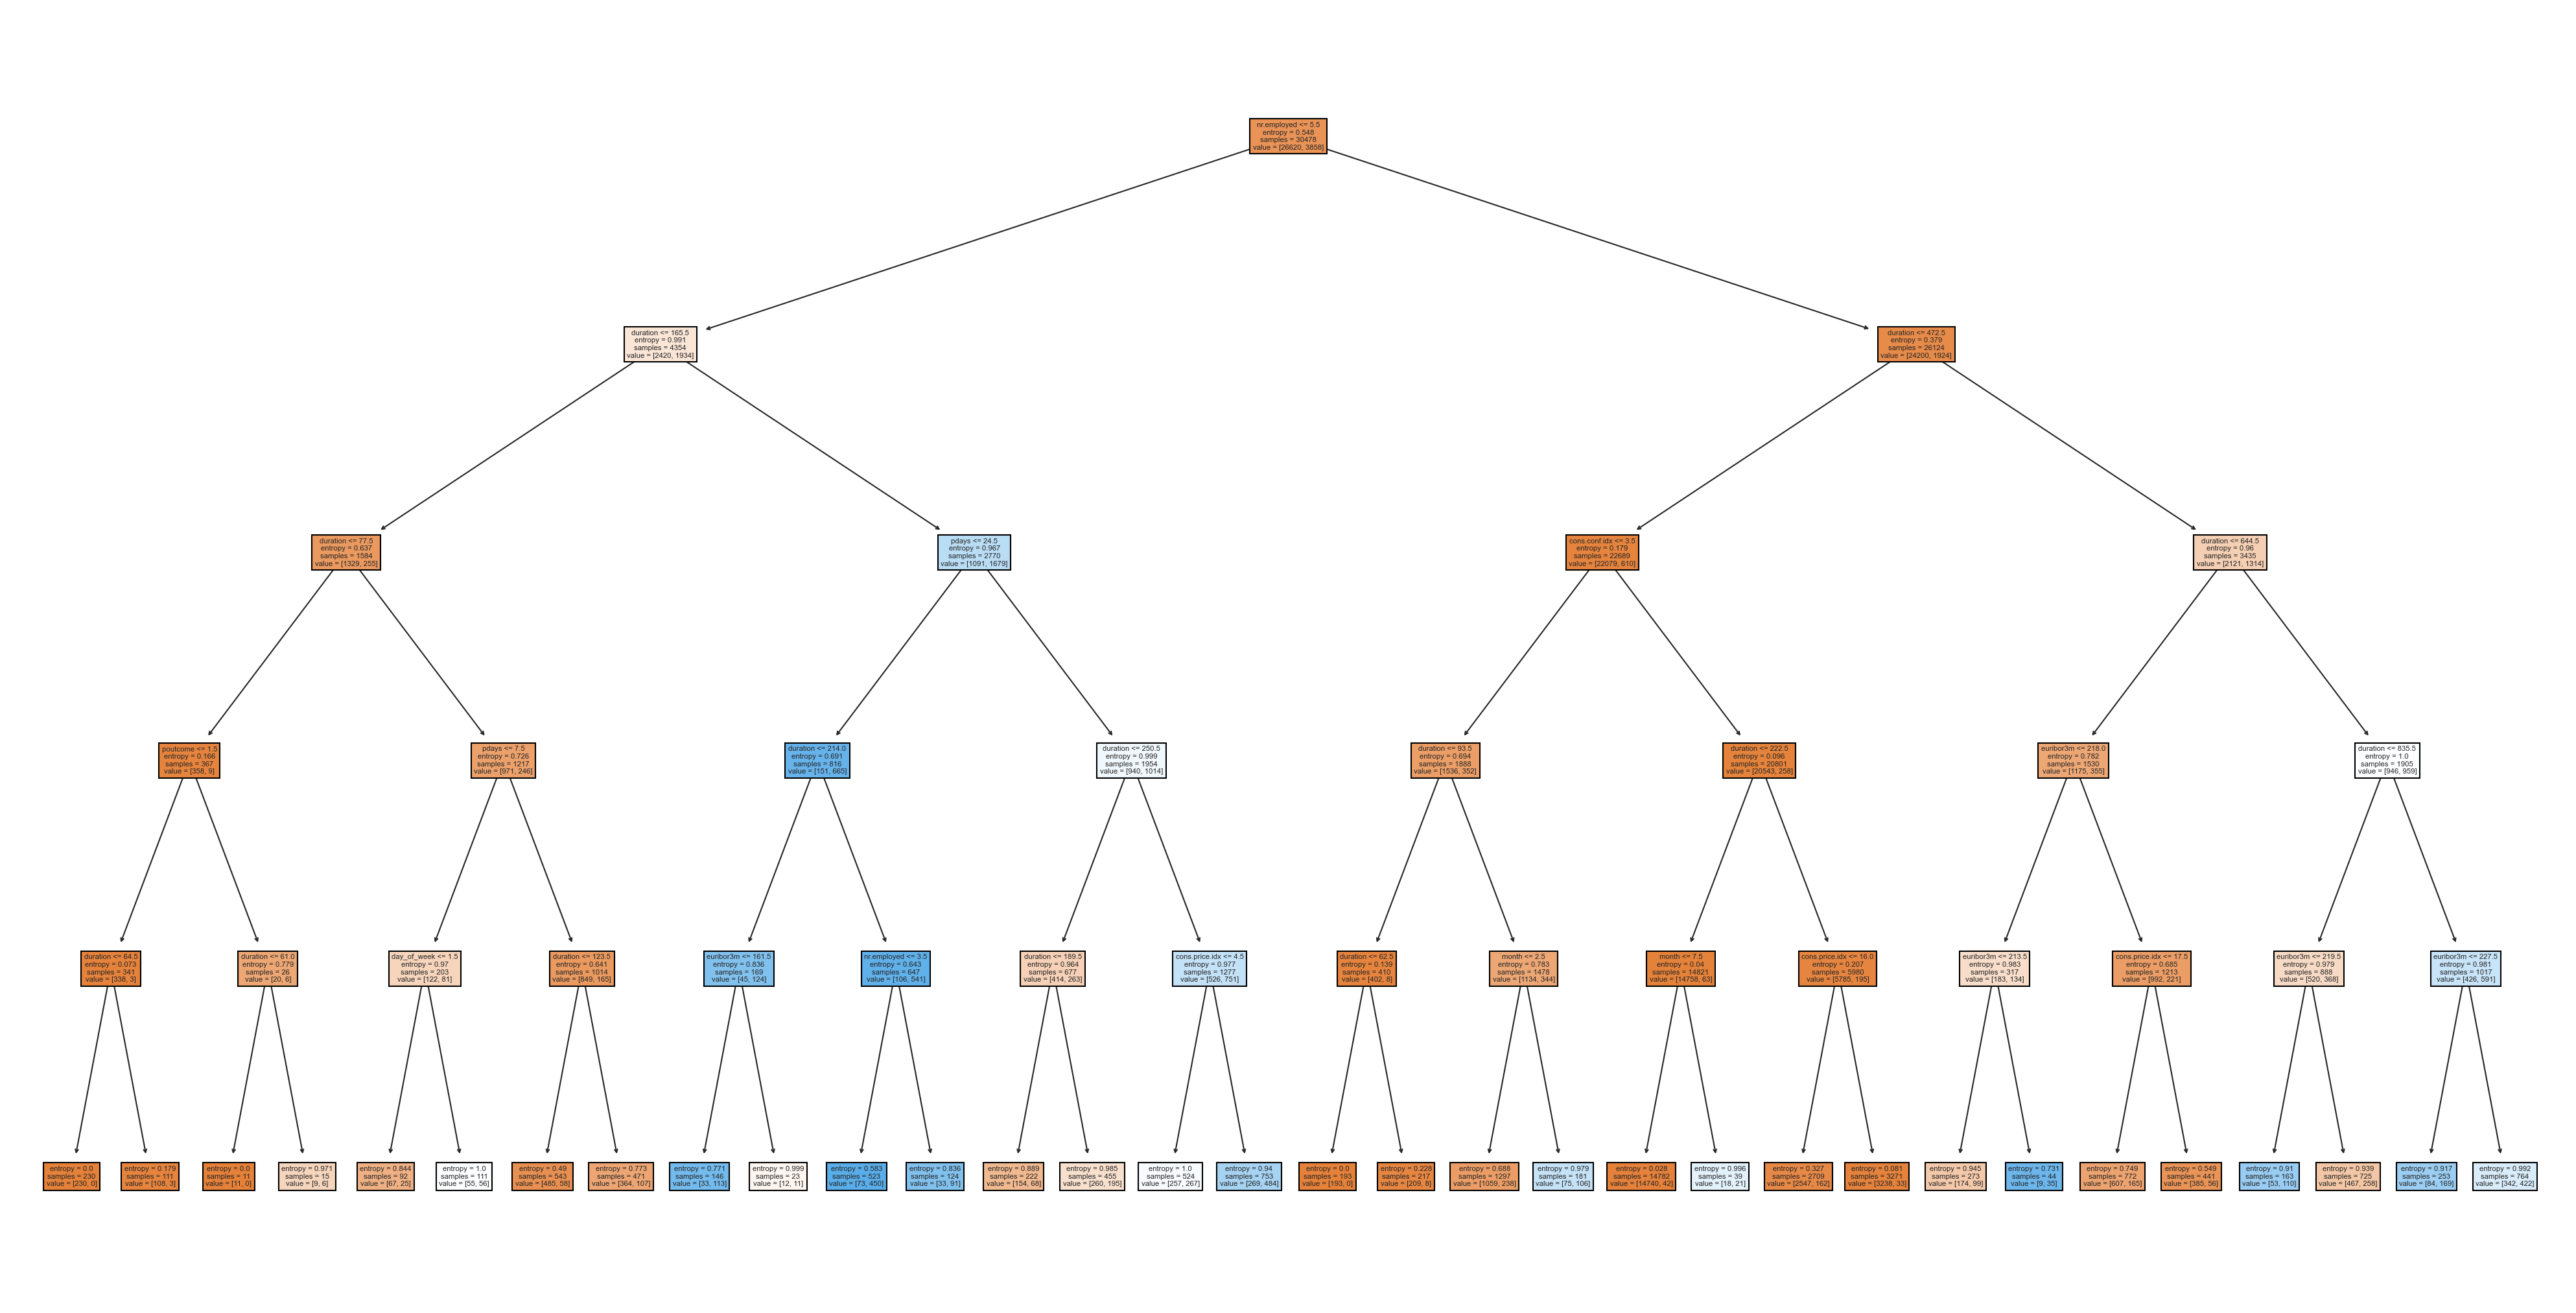

In [31]:
dt_model = DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=42)
dt_model.fit(X,y)

plt.figure(figsize=(10,5),dpi=500)
plot_tree(dt_model,filled=True,feature_names=X.columns)
plt.show()

### Random Forest

In [32]:
# Model Definition
rf_model = RandomForestClassifier(n_estimators=1000,random_state=42)

# Model Training
rf_model.fit(scaled_X_train,y_train)
rf_pred = rf_model.predict(scaled_X_test)

# Model Evaluation
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          no       0.96      0.94      0.95      5309
         yes       0.62      0.71      0.66       787

    accuracy                           0.91      6096
   macro avg       0.79      0.82      0.80      6096
weighted avg       0.91      0.91      0.91      6096



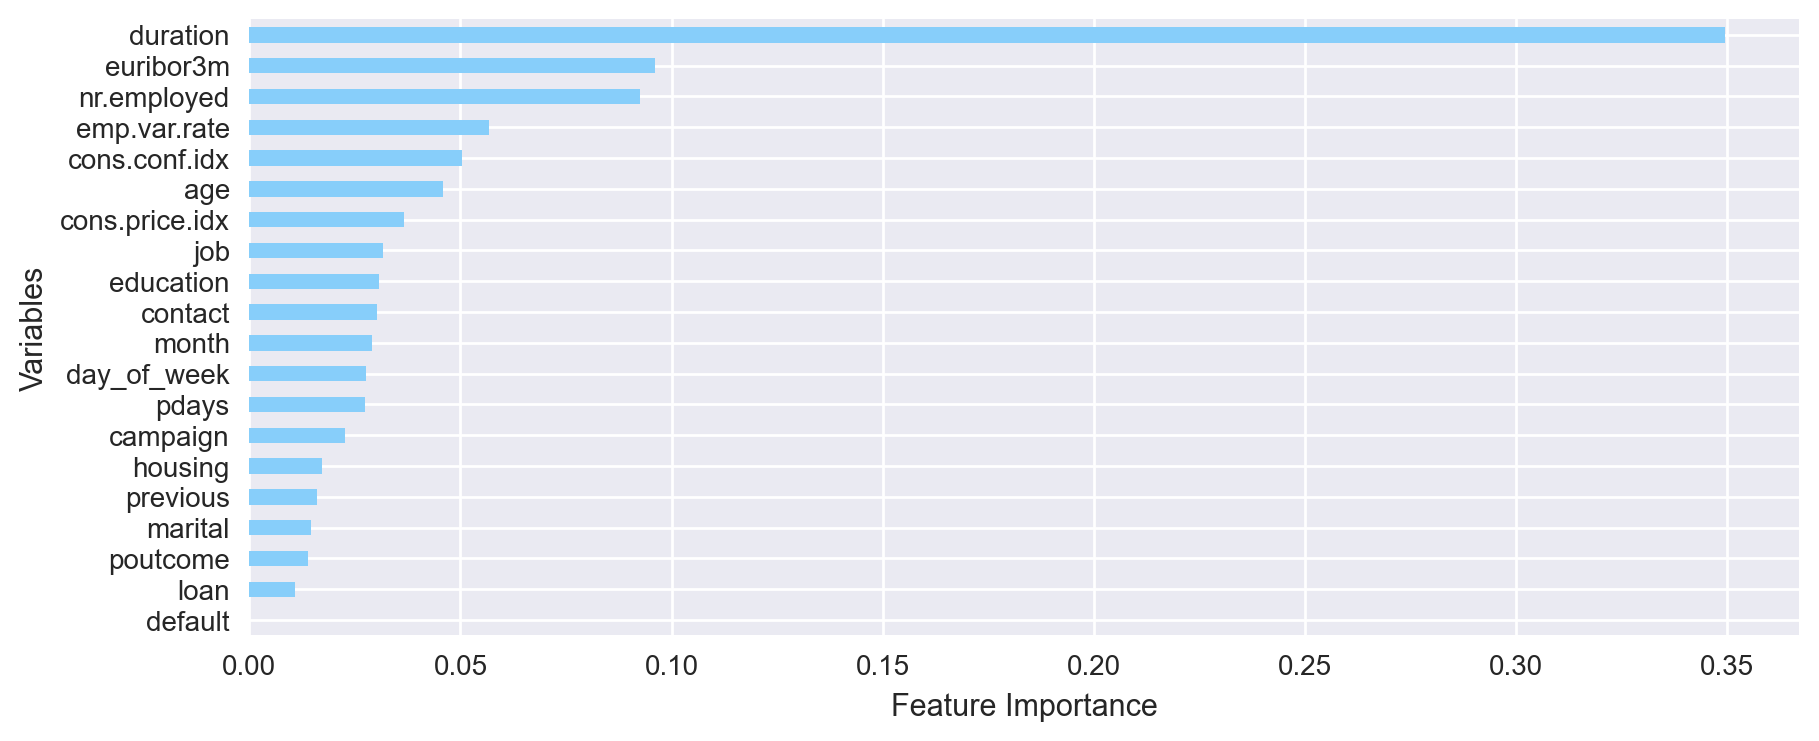

In [33]:
# Melihat masing-masing feature importances pada random forest model
fig = plt.figure(dpi=200)
pd.DataFrame(
    data=rf_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
).sort_values("Feature Importance",ascending=True).plot(
    figsize=(10,4),
    kind="barh",
    legend=None,
    color="lightskyblue",
    ax=plt.gca()
)
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.show()

### Naive Bayes

In [34]:
# Model Definition
nb_model = BernoulliNB(alpha=1)

# Model Training
nb_model.fit(scaled_X_train,y_train)
nb_pred = nb_model.predict(scaled_X_test)

# Model Evaluation
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

          no       0.94      0.73      0.82      5309
         yes       0.28      0.70      0.40       787

    accuracy                           0.73      6096
   macro avg       0.61      0.72      0.61      6096
weighted avg       0.86      0.73      0.77      6096



## Confusion Matrix

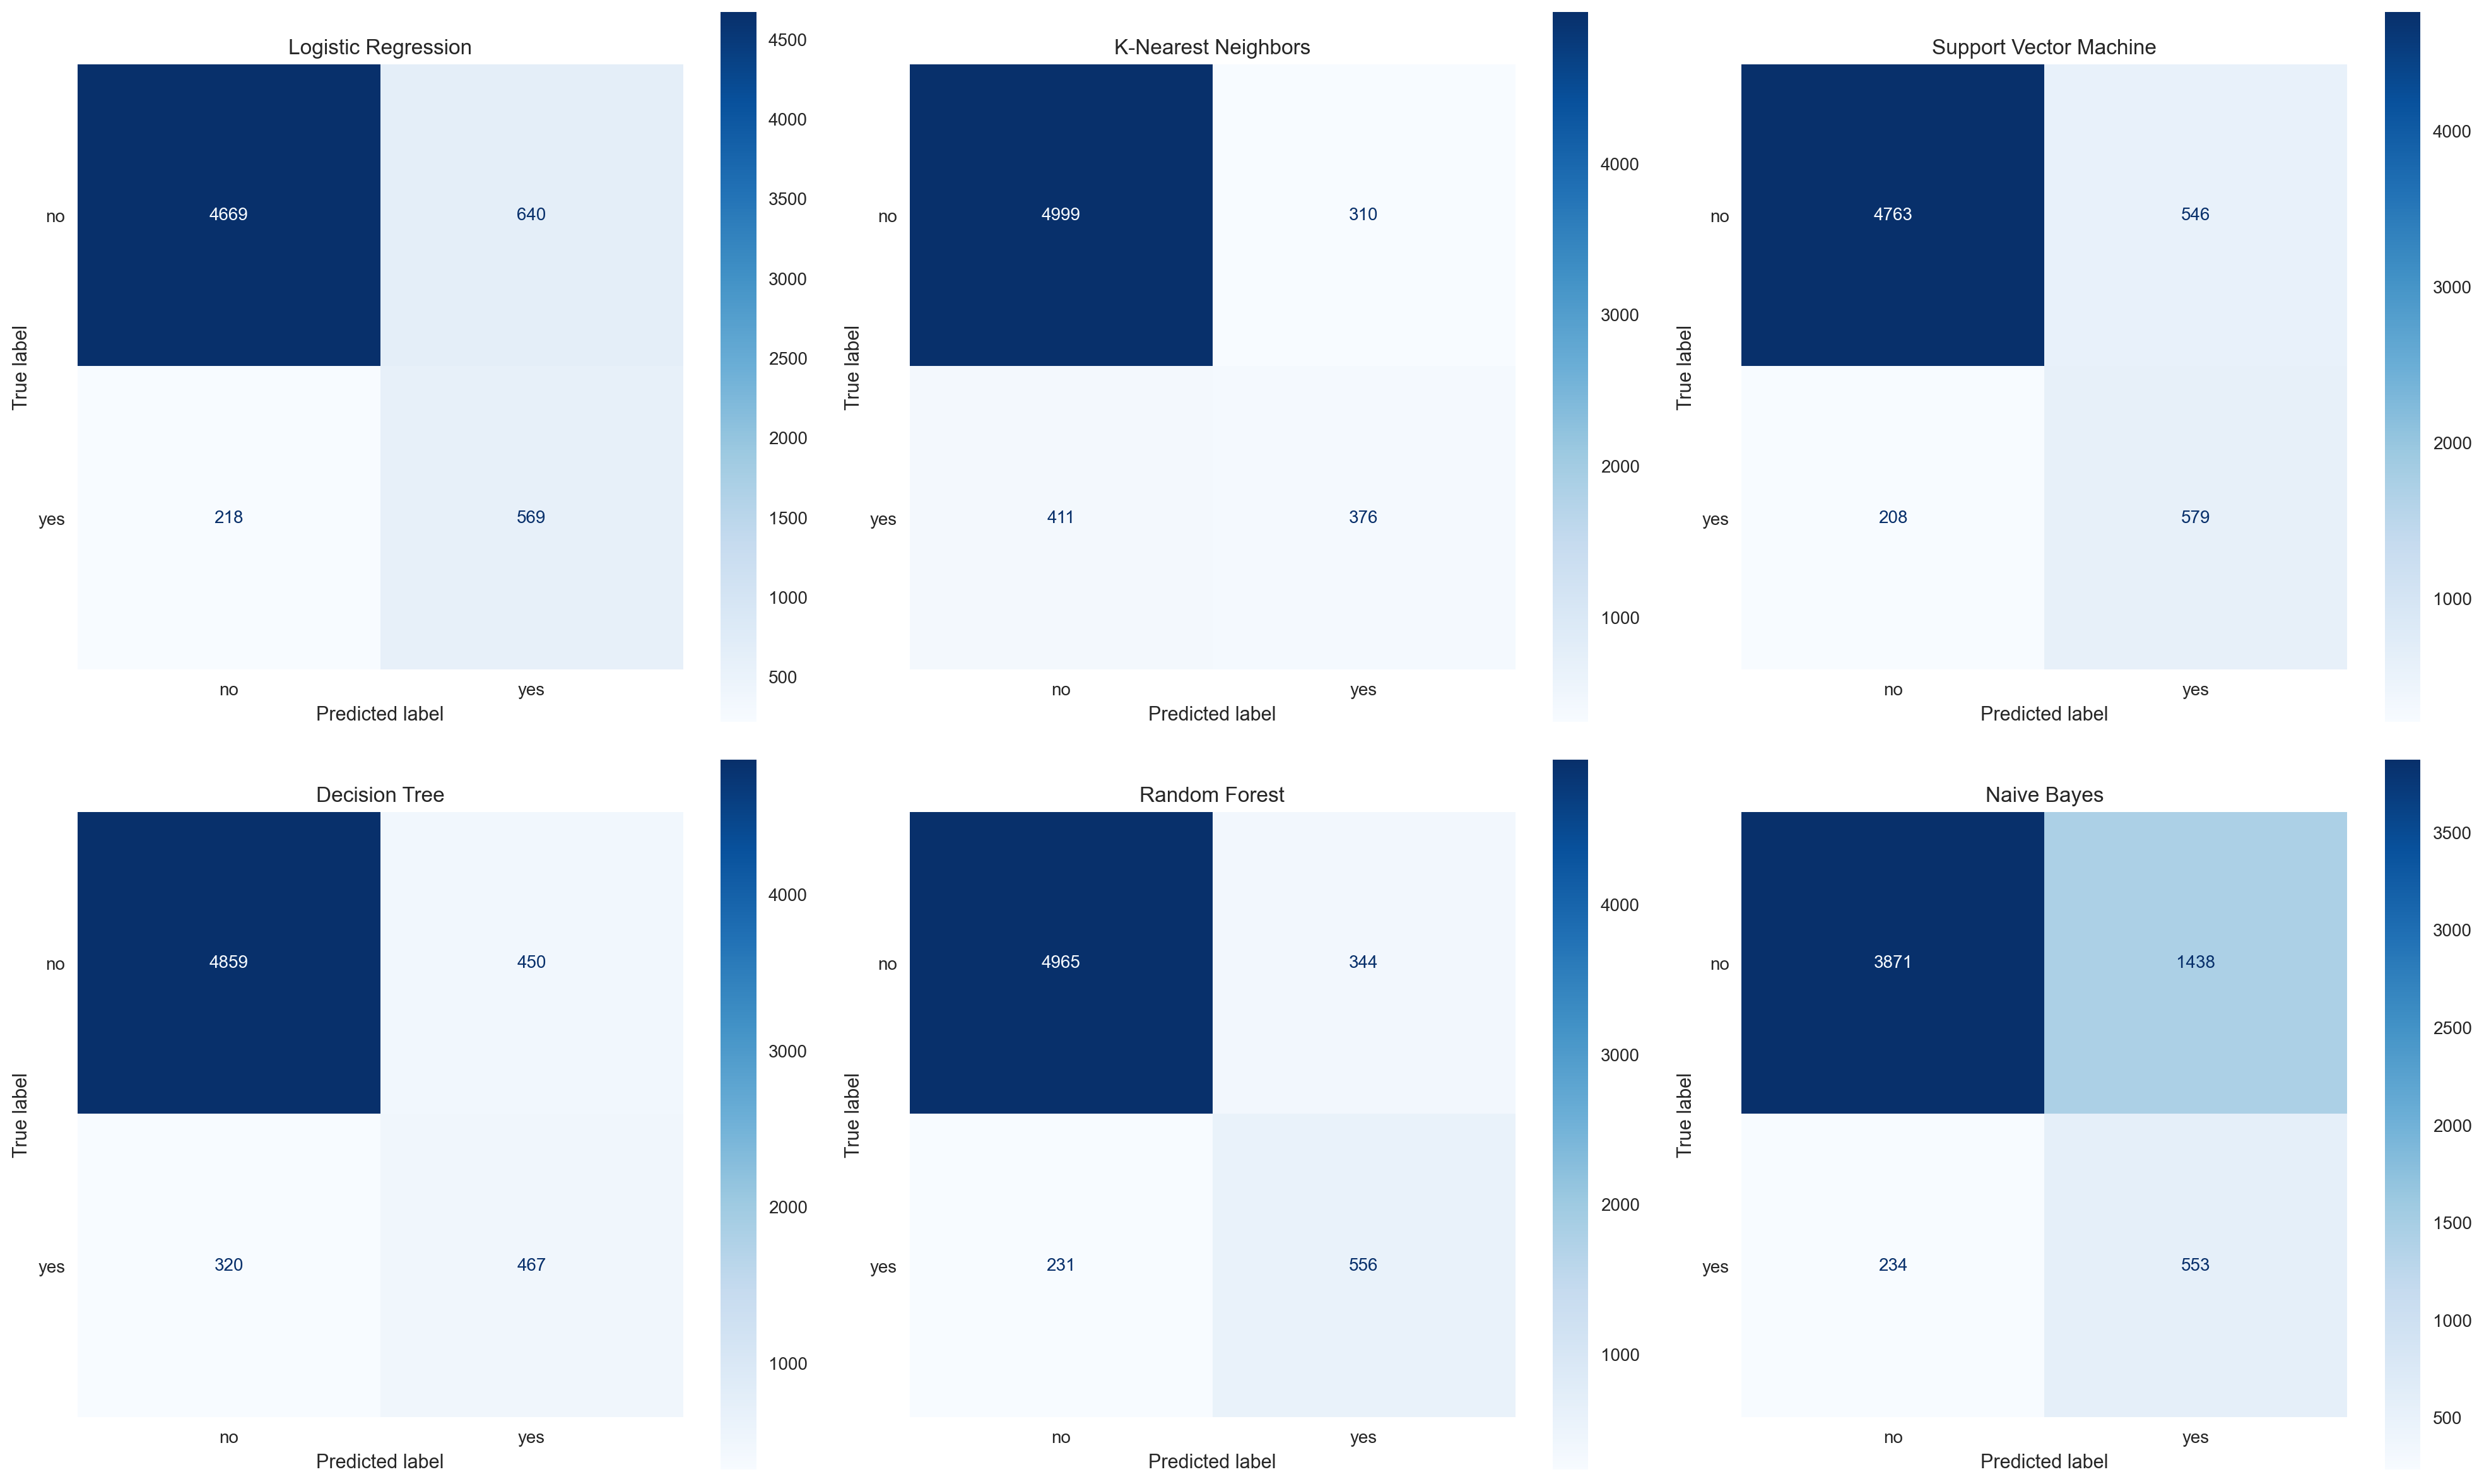

In [35]:
preds = [log_pred,knn_pred,svm_pred,dt_pred,rf_pred,nb_pred]
titles = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Naive Bayes"]

for pred,title in zip([preds],[titles]):
    nrows,ncols = 2,3
    fig,ax = plt.subplots(nrows,ncols,figsize=(20,12),dpi=200)

    n = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            if n == len(pred):
                    break
            else:
                ConfusionMatrixDisplay.from_predictions(y_test,pred[n],cmap="Blues",ax=ax[nrow,ncol])
                ax[nrow,ncol].set_title(title[n])
                ax[nrow,ncol].grid(False)
                n += 1

    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

## Conclusion

In [36]:
print("Logistic Regression:", round(accuracy_score(y_test, log_pred), 3))
print("K-Nearest Neighbors:", round(accuracy_score(y_test, knn_pred), 3))
print("Support Vector Machine:", round(accuracy_score(y_test, svm_pred), 3))
print("Decision Tree:", round(accuracy_score(y_test, dt_pred), 3))
print("Random Forest:", round(accuracy_score(y_test, rf_pred), 3))
print("Naive Bayes:", round(accuracy_score(y_test, nb_pred), 3))


Logistic Regression: 0.859
K-Nearest Neighbors: 0.882
Support Vector Machine: 0.876
Decision Tree: 0.874
Random Forest: 0.906
Naive Bayes: 0.726


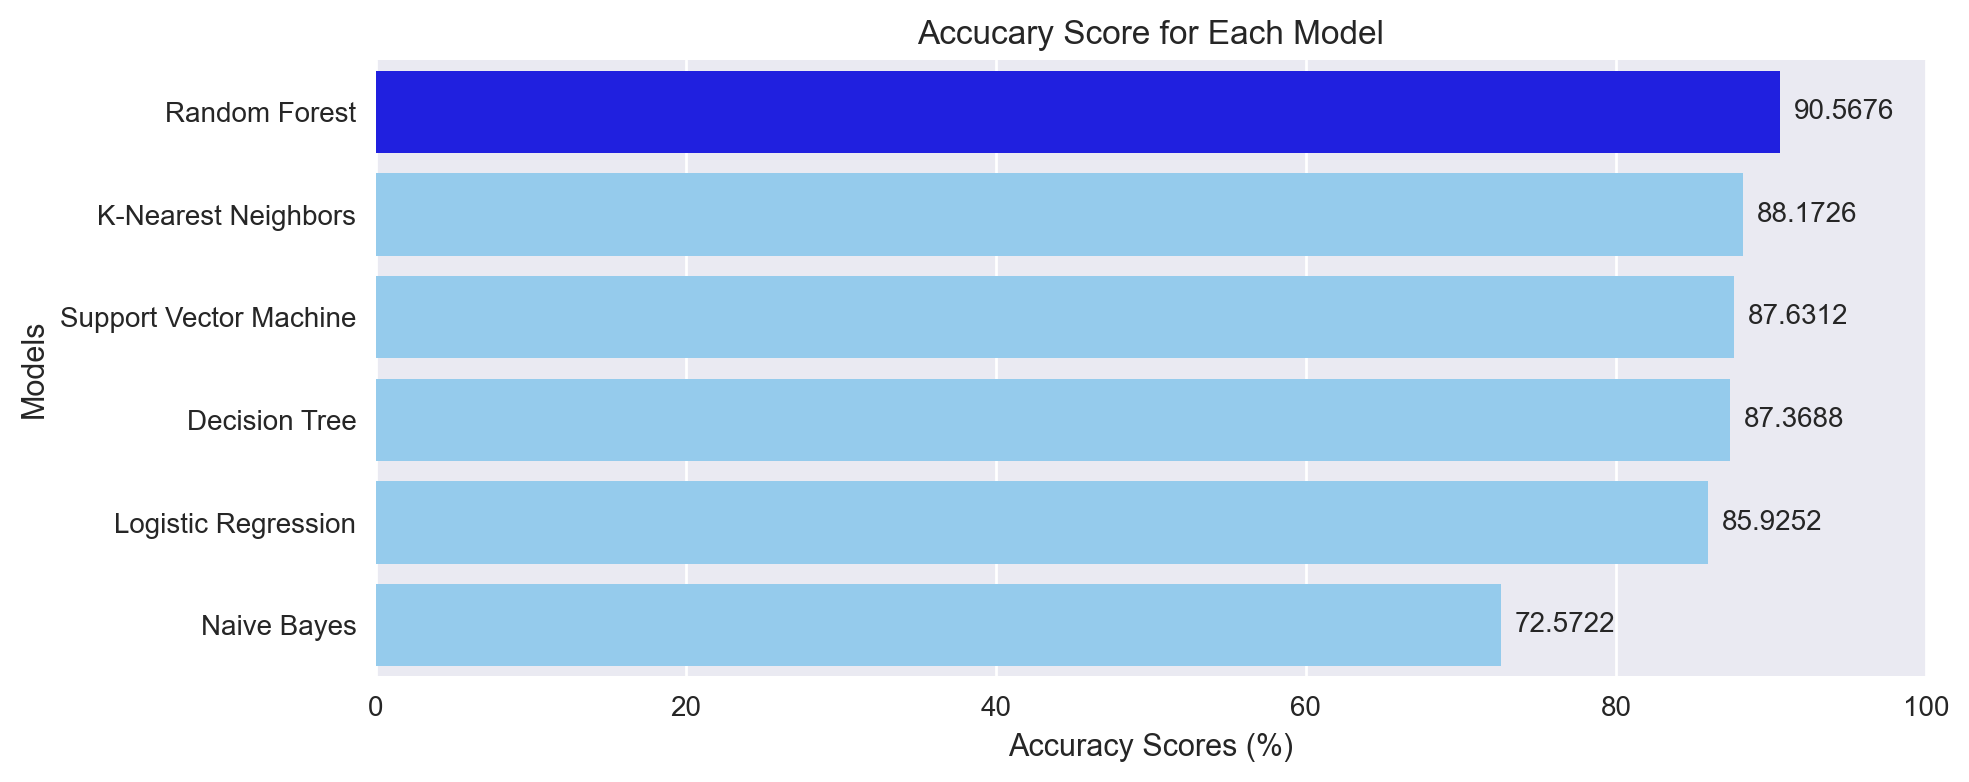

In [37]:
preds = [log_pred,knn_pred,svm_pred,dt_pred,rf_pred,nb_pred]
models = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Naive Bayes"]

accuracy_scores = [accuracy_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores",ascending=False)

plt.figure(figsize=(10,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["blue" if i == comparison.head(1).iloc[0,0] else "lightskyblue" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

Setelah menganalisis beberapa algoritma yakni Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Trees, Random Forest, dan Naive Bayes. Dari hasil analisis tersebut, ditemukan bahwa model Random Forest memiliki akurasi tertinggi, mencapai 91%, yang lebih baik dibandingkan dengan model lainnya.

Random Forest memiliki kelebihan dalam mengurangi risiko overfitting dengan menggabungkan berbagai pohon keputusan dan mampu menilai relatif pentingnya fitur-fitur. Namun, penggunaan Random Forest memerlukan tuning parameter yang hati-hati.

K-Nearest Neighbors (KNN) juga memberikan hasil yang baik dengan akurasi sebesar 88%, menjadikannya model kedua terbaik. KNN sangat cocok untuk melakukan klasifikasi pada data yang tidak memiliki hubungan linier antara fitur dan target.

Disusul oleh Support Vector Machine, Decision Tree, dan Logistic Regression dengan akurasi yang baik pula. Model Logistic Regression cocok untuk data yang memiliki hubungan linier antara fitur dan target, serta dapat digunakan untuk klasifikasi biner atau multikelas. Lalu untuk Naive Bayes memiliki akurasi yang paling rendah yakni 73%. 

Dari penjelasan di atas, model yang paling sesuai adalah Random Forest, karena selain memiliki akurasi tertinggi, model ini juga memiliki confusion matrix paling baik (true yes dan true no nya) apabila dibandingkan dengan model lainnya. Selain itu pemilihan Random Forest diambil karena alasan kemudahan interpretasi, kecepatan komputasi dibandingkan dengan SVM, dan sesuai dengan sifat data yang dimiliki. Sehingga dalam kasus ini, model algoritma Random Forest adalah model yang terbaik.

In [38]:
final_models = [log_pred,knn_pred,svm_pred,dt_pred,rf_pred,nb_pred]
file_names = ["logistic_regression","knn","svm","decision_tree","random_forest","naive_bayes"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

logistic_regression.joblib has been saved successfully!
knn.joblib has been saved successfully!
svm.joblib has been saved successfully!
decision_tree.joblib has been saved successfully!
random_forest.joblib has been saved successfully!
naive_bayes.joblib has been saved successfully!
